In [3]:
# KoNLPy하려면 먼저 JDK가 설치되어 있어야 하면 운영체제 환경변수에 JAVA_HOME 환경변수를 만든 후에  
# java_jdk가 설치되어 있는 경로를 설정해 준다.
# pip install -U "jpype1<1.1"
# pip install konlpy
# pip list : tweepy를 3.7.0 ~3.10.0 사이가 아니면  삭제 후 다시 설치
# pip uninstall tweepy
# pip install tweepy==3.7.0

from konlpy.tag import Okt
okt = Okt()
malist = okt.pos("아버지 가방에 들어가신다.", norm=True, stem=True)
print(malist)



[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [5]:
# http://ithub.korean.go.kr/user/total/database/corpusManager.db 여기서 파일을 받아옴
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
# utf-16 인코딩으로 파일을 열고 글자를 출력하기 --- (※1)
fp = codecs.open("BEXX0003.txt", "r", encoding="utf-16")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("body > text")
text = body.getText()
# 텍스트를 한 줄씩 처리하기 --- (※2)
twitter = Twitter()
word_dic = {}
lines = text.split("\n")
for line in lines:
    malist = twitter.pos(line)
    for word in malist:
        if word[1] == "Noun": #  명사 확인하기 --- (※3)
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] += 1 # 카운트하기
# 많이 사용된 명사 출력하기 --- (※4)
keys = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
for word, count in keys[:50]:
    print("{0}({1}) ".format(word, count), end="")
print()

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


것(644) 그(554) 말(485) 안(304) 소리(196) 길(194) 용이(193) 눈(188) 놈(180) 내(174) 사람(167) 봉(165) 치수(160) 평산(160) 얼굴(156) 거(152) 네(151) 일(149) 이(148) 못(147) 댁(141) 생각(141) 때(139) 강청댁(137) 수(134) 서방(131) 집(131) 나(122) 더(120) 서희(119) 머(116) 어디(112) 마을(111) 최(110) 년(109) 김(99) 칠성(97) 구천이(96) 니(96) 뒤(91) 제(90) 날(90) 아이(88) 하나(84) 녀(83) 두(83) 참판(82) 월(82) 손(81) 임(79) 


In [6]:
# pip install gensim

import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from gensim.models import word2vec
# utf-16 인코딩으로 파일을 열고 글자를 출력하기 --- (※1)
fp = codecs.open("BEXX0003.txt", "r", encoding="utf-16")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("body > text")
text = body.getText()
# 텍스트를 한 줄씩 처리하기 --- (※2)
twitter = Okt()
results = []
lines = text.split("\r\n")
for line in lines:
    # 형태소 분석하기 --- (※3)
    # 단어의 기본형 사용
    malist = twitter.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        # 어미/조사/구두점 등은 대상에서 제외 
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
    print(rl)
# 파일로 출력하기  --- (※4)
gubun_file = 'toji.gubun'
with open(gubun_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))
# Word2Vec 모델 만들기 --- (※5)
data = word2vec.LineSentence(gubun_file)
model = word2vec.Word2Vec(data, 
    vector_size=200, window=10, hs=1, min_count=2, sg=1)
model.save("toji.model")
print("ok")

제 1 편 어둠 발 소리 
 서다 序 
 1897년 의 한가위 
 까치 들 울타리 안 감나무 오다 아침 인사 하다 전 무색 옷 댕기 꼬리 늘 아이 들 송편 입 물 마을 길 쏘다 기쁘다 날뛰다 어른 들 해 중천 좀 기울어지다 무렵 이 래야 차례 치르다 하다 성묘 하다 하다 이웃 끼리 음식 나누다 보다 한나절 넘다 이 때 타 작 마당 사람 들 모 이기 시작 들뜨다 시작 남정 노인 들 아낙 들 채비 아무래도 더디다 그렇다 수 없다 것 식구 들 시중 음식 간수 끝내다 제 자신 치장 남아 있다 이 바람 고개 무겁다 벼 이삭 황금 빛 물결 이루다 들판 마음 놓다 새 떼 들 모여들다 풍 성하다 향연 벌이다 
 후우 이이 이 놈 새 떼 들 극성 새 쫓다 할망구 와삭 와삭 풀발 선 출입 옷 갈아입다 타 작 마당 굿 보고 있다 것 추석 마을 남녀 노유 사람 들 뿐 아니다 강아지 돼지 소나 말 새 들 시궁창 드나들다 쥐 새끼 포식 날인 보다 
 빠르다 장단 꽹과리 소리 느리다 장단 둔중하다 여음 울리다 징 소리 타 작 마당 거리 멀다 최 참판 댁 사랑 흐느낌 슬프다 들려오다 농부 들 지금 꽃 달리다 고깔 흔들다 신명 내다 괴롭다 하다 일상 日常 잊다 굿 놀이 열중 있다 것 최 참판 댁 섭섭찮 전곡 錢穀 이 나가다 풍년 미치다 못 하다 실하다 평작 임 틀림 없다 것 모처럼 허리 끈 풀다 쌀밥 식구 들 배 두드리다 테 하루 근심 잊다 만 하다 것 
 이 날 수 수 개비 꺾다 아이 들 매 맞다 않다 여러 달 솟다 증 素症 풀다 느긋하다 늙은이 들 뒷간 출입 잦다 힘 좋다 젊은이 들 벌써 읍내 가다 없다 황소 하다 마리 끌 돌아오다 꿈 꾸미다 읍내 씨름판 몰리다 간 것 
 최 참판 댁 사랑 무인 지경 적막하다 햇빛 맑다 뜰 비치다 사람 들 모두 어디 가버리다 새롭다 바르다 방문 장지 낯설다 
 한동안 타 작 마당 굿 놀이 멎다 것 같다 별안간 경 풍 들리다 것 꽹과리 악 쓴다 빠르다 드높다 꽹과리 따르다 징 소리 빨르다 깨깽 깨애깽 덥다 응응 음 깨깽 깨애깽 덥다 응응 음 장구 북 사이

ok


In [7]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load("toji.model")
print(model.wv.most_similar(positive=["땅"]))

[('틀림', 0.8720852732658386), ('원귀', 0.846053421497345), ('치우다', 0.8431880474090576), ('작정', 0.8380412459373474), ('광실', 0.8359410166740417), ('사시', 0.835710883140564), ('장차', 0.8355679512023926), ('만석꾼', 0.8349519371986389), ('조상', 0.8321784138679504), ('할배', 0.830923855304718)]


In [8]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load("toji.model")
print(model.wv.most_similar(positive=["집"]))

[('제', 0.7662521600723267), ('그까짓', 0.7535871863365173), ('이지마', 0.7509467601776123), ('돌아오다', 0.7433863878250122), ('볼일', 0.739737331867218), ('만나다', 0.7369204759597778), ('구석', 0.733128011226654), ('조랑', 0.7221136689186096), ('말짱', 0.7199907302856445), ('어울리다', 0.7149646878242493)]


# 루비 설치
https://rubyinstaller.org/downloads/

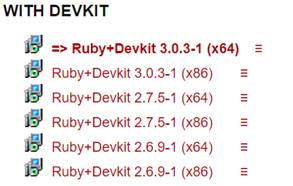

루비를 다운로드 받아 설치한다. 설치 후 프롬프트에서 아래 명령을 실행

wp2txt를 설치한다. ( 맥  사용자는 여기부터  )

c:> gem install wp2txt

xml파일을 txt로 변환한다.

c:> wp2txt --input-file ./kowiki-latest-pages-articles.xml

여러개의 텍스트 파일을 하나로 합친다.

c:> type kowiki-latest-pages-articles-*.txt > wiki.txt

In [9]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from gensim.models import word2vec
# 파일 열기
readFp = codecs.open("wiki.txt", "r", encoding="utf-8")
gubun_file = "wiki.gubun"
writeFp = open(gubun_file, "w", encoding="utf-8")
# 형태소 분석 --- (※2)
twitter = Okt()
i = 0
# 텍스트를 한 줄씩 처리하기
while True:
    line = readFp.readline()
    if not line: break
    if i % 20000 == 0:
        print("current - " + str(i))
    i += 1
    # 형태소 분석
    malist = twitter.pos(line, norm=True, stem=True)
    # 필요한 어구만 대상으로 하기
    r = []
    for word in malist:
        # 어미/조사/구두점 등은 대상에서 제외 
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            writeFp.write(word[0] + " ")
writeFp.close()

FileNotFoundError: [Errno 2] No such file or directory: 'wiki.txt'

In [ ]:
from gensim.models import word2vec
data = word2vec.Text8Corpus("wiki.gubun")
model = word2vec.Word2Vec(data, size=100)
model.save("wiki.model")
print("ok")

In [ ]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load('wiki.model')
print(model.wv.most_similar(positive=["Python","파이썬"]))

In [ ]:
model.wv.most_similar(positive=["아빠","여성"],negative=["남성"])[0]

In [ ]:
model.wv.most_similar(positive=["왕자","여성"],negative=["남성"])[0:5]

In [ ]:
model.wv.most_similar(positive=["서울","일본"],negative=["한국"])[0:5]

In [ ]:
model.wv.most_similar(positive=["서울","중국"],negative=["한국"])[0:5]

In [ ]:
model.wv.most_similar(positive=["오른쪽","남자"],negative=["왼쪽"])[0]

In [ ]:
model.wv.most_similar(positive=["서울","맛집"])[0:5]

In [ ]:
model.wv["고양이"]

In [ ]:
len(model.wv["고양이"])

In [ ]:
len(model.wv["강아지"])

In [ ]:
# 베이즈 정리로 텍스트 분류하기
